In [1]:
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import csv
# csv_file = 'stock_complete_info.csv'
csv_file = 'stock_complete_info_bigrams.csv'
stock_df = pd.read_csv(csv_file, index_col=0)

In [3]:
# add extra column for return next quarter
# get quarterly returns
quarter_returns = pd.read_csv('qtrlyReturns.csv')

In [4]:
stock_df['Name'] = stock_df.index
stock_df['Ticker'] = stock_df.Name.apply(lambda x: x.split()[0])

In [5]:
def nextQtr(x):
    if x == '2019_Q2':
        return 'Q3 2019'
    elif x == '2019_Q3':
        return 'Q4 2019'
    elif x == '2019_Q4':
        return 'Q1 2020'
    else:
        return '5/21/2020'

In [6]:
stock_df['Next Qtr'] = stock_df['Qtr'].apply(lambda x: nextQtr(x))

In [7]:
def getReturn(x):
    next_qtr = x['Next Qtr']
    return (quarter_returns.loc[quarter_returns.Ticker == x['Ticker']][next_qtr]).iloc[0]

In [8]:
stock_df['Next Qtr Return'] = stock_df[['Next Qtr', 'Ticker']].apply(getReturn, axis=1).astype(float)

In [9]:
# drop long business summary
# stock_df.drop(columns='longBusinessSummary', inplace=True)

In [10]:
# drop price / volume related columns
stock_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], inplace=True)

In [11]:
# drop label columns
stock_df.drop(columns=['Date', 'Next Qtr', 'Ticker', 'Name'], inplace=True)

In [12]:
# data set description
stock_df.describe()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,bank financi,clinicalstag biopharmaceut,end user,hold oper,deposit offer,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return,Next Qtr Return
count,5.991000e+03,6.684000e+03,7.598000e+03,7.636000e+03,6.171000e+03,7.598000e+03,7.320000e+03,5.990000e+03,7.149000e+03,7.154000e+03,...,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000
mean,1.220155e+09,2.300608e+09,1.149077e+10,3.477500e+09,1.062894e+09,1.516350e+10,5.850592e+08,6.640580e+08,2.552704e+09,2.726061e+09,...,0.000930,0.000929,0.000928,0.000928,0.000927,-4.870368,-5.351082,0.495031,0.515690,-1.067488
std,5.868182e+09,6.368379e+09,6.542997e+10,1.248251e+10,7.754348e+09,7.496027e+10,4.527754e+09,4.820717e+09,1.120439e+10,2.518094e+10,...,0.007603,0.008245,0.008542,0.008302,0.008296,15.184749,14.021431,0.500008,0.499786,31.346801
min,8.000000e+03,1.800000e+04,8.776060e+05,-1.294400e+10,-6.506000e+06,1.839283e+07,-1.246000e+09,-1.000000e+06,-2.137800e+10,1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,-29.987849,-28.825088,0.000000,0.000000,-94.307359
25%,2.318400e+07,2.677002e+08,4.075288e+08,2.607575e+08,1.385450e+07,8.805915e+08,1.377500e+05,7.632500e+06,-1.230000e+08,2.303100e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.035381,-8.743552,0.000000,0.000000,-16.748781
50%,1.141000e+08,6.420060e+08,1.668784e+09,7.511050e+08,6.190000e+07,2.566280e+09,1.000000e+06,3.308850e+07,2.205720e+08,1.099945e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029850,-0.273703,0.000000,1.000000,0.134825
75%,4.810000e+08,1.799750e+09,5.532413e+09,2.367646e+09,2.741220e+08,8.318456e+09,1.745100e+07,1.551462e+08,1.335909e+09,5.382700e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.194864,3.118767,1.000000,1.000000,12.316887
max,1.607590e+11,1.299660e+11,2.355036e+12,2.467190e+11,2.775000e+11,2.619954e+12,1.066190e+11,1.612190e+11,1.629540e+11,7.636310e+11,...,0.088359,0.126016,0.149911,0.117437,0.089895,10.446679,7.968167,1.000000,1.000000,629.256966


In [13]:
# see nan's
pd.set_option('display.max_rows', 100)
stock_df.isnull().sum()

Intangible Assets                     1657
Capital Surplus                        964
Total Liab                              50
Total Stockholder Equity                12
Other Current Liab                    1477
                                      ... 
Entire Market Return                     0
Outlier Removed Market Return            0
Beat Entire Market Return                0
Beat Outlier Removed Market Return       0
Next Qtr Return                          0
Length: 595, dtype: int64

In [14]:
# drop columns with all nan's
stock_df.dropna(axis=1, how='all', inplace=True)

In [15]:
# only keep rows where technical indicators exist
stock_df.dropna(axis=0, how='any', subset=['kama', 'cmf', 'emi'], inplace=True)

In [16]:
# fill nan's with 0's for the rest
stock_df.fillna(0, inplace=True)

In [17]:
stock_df.describe()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,bank financi,clinicalstag biopharmaceut,end user,hold oper,deposit offer,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return,Next Qtr Return
count,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,7.641000e+03,...,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000
mean,9.561751e+08,2.012053e+09,1.142502e+10,3.474283e+09,8.584014e+08,1.507609e+10,5.603388e+08,5.205678e+08,2.387582e+09,2.552138e+09,...,0.000931,0.000929,0.000929,0.000929,0.000928,-4.875290,-5.355465,0.495223,0.515901,-1.071700
std,5.220207e+09,6.004782e+09,6.525141e+10,1.247894e+10,6.981116e+09,7.475799e+10,4.433181e+09,4.276917e+09,1.085576e+10,2.437428e+10,...,0.007606,0.008249,0.008546,0.008306,0.008300,15.185498,14.022308,0.500010,0.499780,31.292129
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.294400e+10,-6.506000e+06,0.000000e+00,-1.246000e+09,-1.000000e+06,-2.137800e+10,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,-29.987849,-28.825088,0.000000,0.000000,-94.307359
25%,1.381000e+06,1.377740e+08,3.925320e+08,2.589270e+08,1.940000e+06,8.563930e+08,1.000000e+05,3.890000e+05,-8.695400e+07,1.500800e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,-29.987849,-28.825088,0.000000,0.000000,-16.747377
50%,5.232100e+07,4.921290e+08,1.646900e+09,7.463000e+08,3.196300e+07,2.544497e+09,8.400000e+05,1.521600e+07,1.682040e+08,9.360800e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.051225,-2.049707,0.000000,1.000000,0.140714
75%,3.179240e+08,1.520244e+09,5.497300e+09,2.364059e+09,1.831330e+08,8.281732e+09,1.327500e+07,9.617900e+07,1.168301e+09,4.835000e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.110926,1.502301,1.000000,1.000000,12.317961
max,1.607590e+11,1.299660e+11,2.355036e+12,2.467190e+11,2.775000e+11,2.619954e+12,1.066190e+11,1.612190e+11,1.629540e+11,7.636310e+11,...,0.088359,0.126016,0.149911,0.117437,0.089895,10.446679,7.968167,1.000000,1.000000,629.256966


In [18]:
# get location of fundamental columns
stock_df.columns.get_loc('country')
stock_df.columns.get_loc('sharesShort')
stock_df.columns.get_loc('Short Term Investments')

63

67

83

In [19]:
# get fundamentals on per outstanding share basis
fundamentalsPerShare = stock_df.iloc[:,0:62].div(stock_df.sharesOutstanding, axis=0)
sharesShortPerShare = stock_df.iloc[:,67:68].div(stock_df.sharesOutstanding, axis=0)
extraFundamentalsPerShare = stock_df.iloc[:,83:85].div(stock_df.sharesOutstanding, axis=0)

In [20]:
# transformed dataframe
stock_df.drop(columns=['sharesShort', 'Short Term Investments', 'Deferred Long Term Liab'], inplace=True)
processed_stock_df = pd.concat([fundamentalsPerShare, sharesShortPerShare, extraFundamentalsPerShare, stock_df.iloc[:,63:]], axis=1)

In [21]:
processed_stock_df.describe()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,bank financi,clinicalstag biopharmaceut,end user,hold oper,deposit offer,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return,Next Qtr Return
count,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,...,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000
mean,4.632349,13.791637,68.606130,22.189619,3.542750,91.561090,2.223821,2.976002,14.136789,11.463503,...,0.000931,0.000929,0.000929,0.000929,0.000928,-4.875290,-5.355465,0.495223,0.515901,-1.071700
std,13.602040,22.791784,171.523890,44.643977,16.729167,198.867852,10.849256,15.945320,69.015173,79.885208,...,0.007606,0.008249,0.008546,0.008306,0.008300,15.185498,14.022308,0.500010,0.499780,31.292129
min,0.000000,0.000000,0.000000,-87.781350,-0.109817,0.000000,-9.375056,-0.011712,-191.425509,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-29.987849,-28.825088,0.000000,0.000000,-94.307359
25%,0.035310,3.843261,8.843576,6.543010,0.039031,19.098152,0.001191,0.007142,-1.299546,0.370660,...,0.000000,0.000000,0.000000,0.000000,0.000000,-29.987849,-28.825088,0.000000,0.000000,-16.747377
50%,0.889888,9.382289,24.820568,14.551834,0.513168,42.043755,0.010315,0.282438,4.637250,1.629749,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.051225,-2.049707,0.000000,1.000000,0.140714
75%,4.069256,16.586699,65.522428,26.543502,2.027215,92.623501,0.167993,1.136131,17.599557,5.036695,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.110926,1.502301,1.000000,1.000000,12.317961
max,325.513672,577.945947,4107.391616,803.675201,349.094316,4539.283461,256.156721,440.179306,2196.677642,1939.134078,...,0.088359,0.126016,0.149911,0.117437,0.089895,10.446679,7.968167,1.000000,1.000000,629.256966


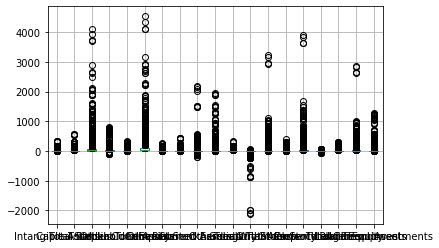

In [22]:
# view some data distributions
processed_stock_df.iloc[:,:19].boxplot()

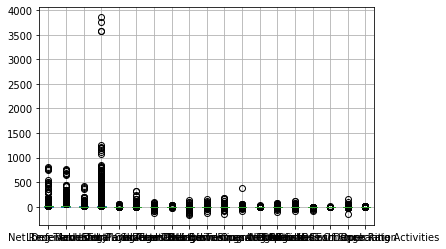

In [23]:
processed_stock_df.iloc[:,20:39].boxplot()

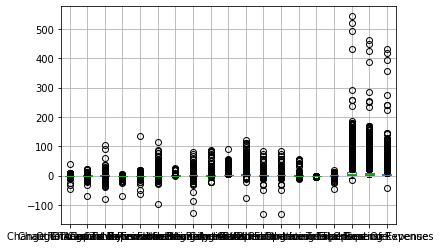

In [24]:
processed_stock_df.iloc[:,40:59].boxplot()

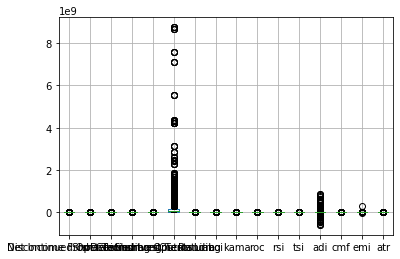

In [25]:
processed_stock_df.iloc[:,60:79].boxplot()

In [26]:
from scipy import stats
outlier_removed_df = processed_stock_df[(np.abs(stats.zscore(processed_stock_df.iloc[:,:86].drop(columns=['country', 'industry', 'sector', 'Return', 'sharesOutstanding']))) < 3).all(axis=1)]

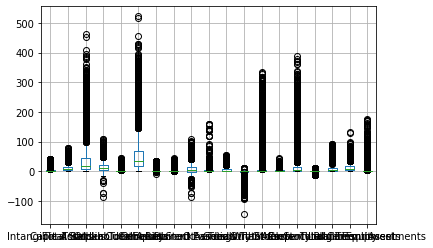

In [27]:
# view updated data distributions
outlier_removed_df.iloc[:,:19].boxplot()

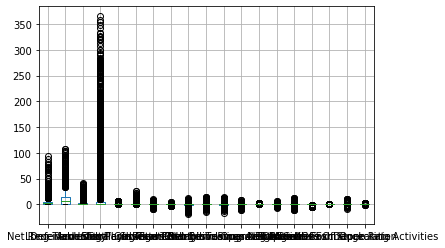

In [28]:
outlier_removed_df.iloc[:,20:39].boxplot()

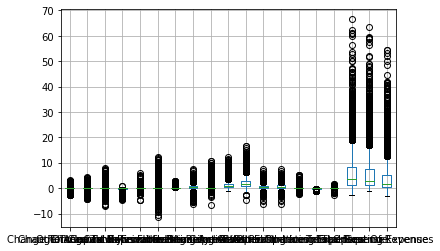

In [29]:
outlier_removed_df.iloc[:,40:59].boxplot()

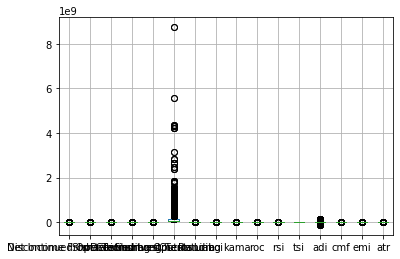

In [30]:
outlier_removed_df.iloc[:,60:79].boxplot()

In [31]:
outlier_removed_df.describe(include='object')

,country,industry,sector,Qtr
count,5143,5143,5143,5143
unique,15,139,11,4
top,United States,Banks—Regional,Financial Services,2019_Q4
freq,5008,596,878,1387


In [34]:
# get dummies for country, industry, sector
outlier_removed_df_dummy = pd.get_dummies(outlier_removed_df, columns=['country', 'industry', 'sector'])

In [35]:
# save this df as .csv
outlier_removed_df_dummy.to_csv('outlier_removed_processed_df_bigrams.csv')